In [29]:
from keras import layers
from keras import models
from keras import optimizers

In [30]:
model = models.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [31]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [32]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [33]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '../data/dogs-and-cats-small/train'
valid_dir = '../data/dogs-and-cats-small/validation'

train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(150, 150),
            batch_size = 20,
            class_mode='binary')

valid_generator = test_datagen.flow_from_directory(
            valid_dir,
            target_size=(150, 150),
            batch_size=20,
            class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [34]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 150, 150, 3)
(20,)


In [35]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=valid_generator,
        validation_steps=50)

Epoch 1/30
100/100 [==============================] - 124s 1s/step - loss: 0.6858 - acc: 0.5630 - val_loss: 0.6607 - val_acc: 0.6090
Epoch 2/30
100/100 [==============================] - 121s 1s/step - loss: 0.6447 - acc: 0.6305 - val_loss: 0.6223 - val_acc: 0.6520
Epoch 3/30
100/100 [==============================] - 121s 1s/step - loss: 0.5946 - acc: 0.6795 - val_loss: 0.6093 - val_acc: 0.6620
Epoch 4/30
100/100 [==============================] - 120s 1s/step - loss: 0.5584 - acc: 0.7120 - val_loss: 0.5904 - val_acc: 0.6750
Epoch 5/30
100/100 [==============================] - 120s 1s/step - loss: 0.5400 - acc: 0.7185 - val_loss: 0.5721 - val_acc: 0.6990
Epoch 6/30
100/100 [==============================] - 122s 1s/step - loss: 0.5117 - acc: 0.7490 - val_loss: 0.6957 - val_acc: 0.6100
Epoch 7/30
100/100 [==============================] - 121s 1s/step - loss: 0.4852 - acc: 0.7570 - val_loss: 0.5566 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 120s 1s/step - 

In [36]:
model.save('cats-and-dogs-small-1.h5')

In [38]:
import matplotlib.pyplot as plt

The validation accuracy stalls around 70% because we have a small dataset. The validation loss continues to increase over time while the training loss continues to decrease. This means that the network fits the training data very well, but is progressively doing worse on the validation data; this is indicative of **overfitting**

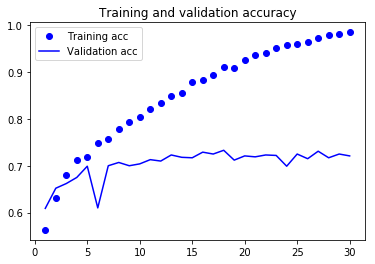

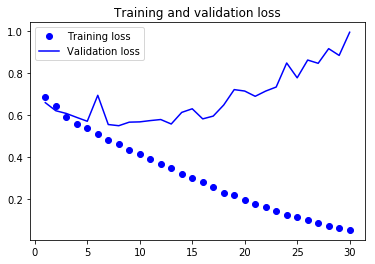

In [40]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We create a ImageDataGenerator instance which will transform and flip images in order to artificially create new data. This augments our data, and so is called 'data augmentation'. This technique is very useful in small-data situations for computer vision.

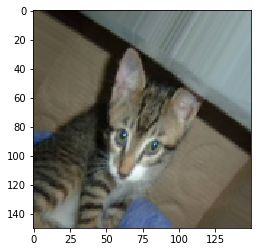

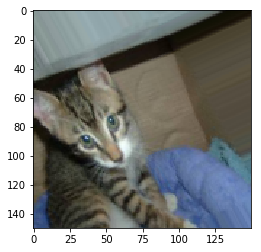

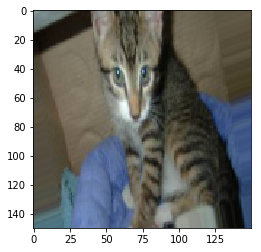

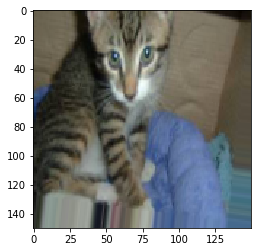

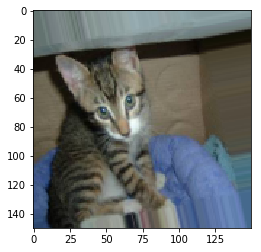

In [46]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

from keras.preprocessing import image
import os

train_cats_dir = os.path.join(train_dir, 'cats')

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[504]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)  # Reshaping to (1, 150, 150, 3)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure()
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 5:
        break

plt.show()



We used **data augmentation** to remix our existing data, but this may not get rid of the overfitting problem entirely. To mitigate overfitting, we can also add a **Dropout** layer. **Dropout** will randomly drop some units along with their connections to prevent the units from adapting to the data together.

In [52]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [53]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

valid_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [54]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=valid_generator,
        validation_steps=50)

Epoch 1/100
100/100 [==============================] - 206s 2s/step - loss: 0.6935 - acc: 0.5178 - val_loss: 0.6978 - val_acc: 0.5006
Epoch 2/100
100/100 [==============================] - 252s 3s/step - loss: 0.6835 - acc: 0.5588 - val_loss: 0.6874 - val_acc: 0.5200
Epoch 3/100
100/100 [==============================] - 219s 2s/step - loss: 0.6692 - acc: 0.5837 - val_loss: 0.7042 - val_acc: 0.5286
Epoch 4/100
100/100 [==============================] - 257s 3s/step - loss: 0.6516 - acc: 0.6172 - val_loss: 0.6696 - val_acc: 0.5709
Epoch 5/100
100/100 [==============================] - 201s 2s/step - loss: 0.6371 - acc: 0.6256 - val_loss: 0.6206 - val_acc: 0.6523
Epoch 6/100
100/100 [==============================] - 213s 2s/step - loss: 0.6319 - acc: 0.6525 - val_loss: 0.6052 - val_acc: 0.6836
Epoch 7/100
100/100 [==============================] - 277s 3s/step - loss: 0.6090 - acc: 0.6641 - val_loss: 0.5953 - val_acc: 0.6802
Epoch 8/100
100/100 [==============================] - 211s 2s

Epoch 62/100
100/100 [==============================] - 184s 2s/step - loss: 0.4311 - acc: 0.7972 - val_loss: 0.4914 - val_acc: 0.7519
Epoch 63/100
100/100 [==============================] - 186s 2s/step - loss: 0.4443 - acc: 0.7959 - val_loss: 0.5030 - val_acc: 0.7796
Epoch 64/100
100/100 [==============================] - 185s 2s/step - loss: 0.4395 - acc: 0.7925 - val_loss: 0.4307 - val_acc: 0.8061
Epoch 65/100
100/100 [==============================] - 185s 2s/step - loss: 0.4496 - acc: 0.7859 - val_loss: 0.4969 - val_acc: 0.7640
Epoch 66/100
100/100 [==============================] - 184s 2s/step - loss: 0.4398 - acc: 0.8003 - val_loss: 0.4536 - val_acc: 0.7925
Epoch 67/100
100/100 [==============================] - 185s 2s/step - loss: 0.4349 - acc: 0.8003 - val_loss: 0.4557 - val_acc: 0.7931
Epoch 68/100
100/100 [==============================] - 191s 2s/step - loss: 0.4488 - acc: 0.7875 - val_loss: 0.4957 - val_acc: 0.7648
Epoch 69/100
100/100 [==============================] -

In [55]:
model.save('cats_and_dogs_small_2.h5')

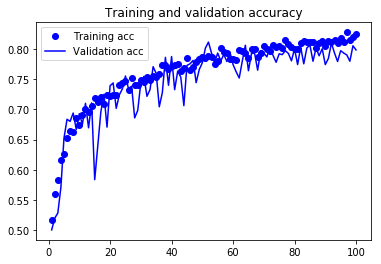

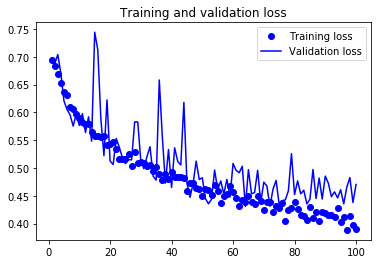

In [56]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()